# Libraries needed

In [203]:
import pickle
import os
from goodreads import client
import re
import matplotlib.pyplot as plt
import requests
import xmltodict
from matplotlib import pyplot as plt

Let's check what we need:
- a client developer id and key
- authenticate

In [91]:
from goodreads import client
gc = client.GoodreadsClient("mt9AJqabq3UrLwUPuU5A", "JR5VAibiS7URSLp2MpplarGc3sddiU4lCfN1CbefdA")

In [12]:
gc.authenticate("mt9AJqabq3UrLwUPuU5A", "JR5VAibiS7URSLp2MpplarGc3sddiU4lCfN1CbefdA")

In [94]:
#Try if the api is working getting the name of the book with ID 1
book = gc.book(1)
book

Harry Potter and the Half-Blood Prince (Harry Potter, #6)

In [93]:
# First we are initiating two empty list for storing the raw data. We will only need to introduce a isbn number after.
rawbooksJsonData=[]
books=[]

gettopbookreviews = 'https://www.goodreads.com/book/review_counts.json?key=oziLg0ZKKztlPTL0E4Q&isbns='

In [97]:
#I forgot to import pandas
import pandas as pd

In [98]:
#Lets open the top 50 books that are being read by argentineans
isbndata=pd.read_csv('books.csv', delimiter=";")
isbndata.head(3)

,title,isbn
0,Aramburu,9789504970170
1,Lo Mucho Que Te Ame.,9789877386417
2,El Alma De Las Flores,9789504969204


In [99]:
#Make sure the isbn column isnt an int type
isbnlist=isbndata['isbn'].astype(str)

In [100]:
#We provide a list of isbn numbers to be check on the website
isbnlist=isbndata['isbn'].values.tolist()[:50]

In [101]:
isbnlist=isbndata['isbn'].astype(str)

In [102]:
for isbn in isbnlist:
    gettopbookreviews = gettopbookreviews+isbn+","

In [103]:
# Iterating for 100 books and fetching the results in json format for the top books
bookData = requests.get(gettopbookreviews)
rawbooksJsonData.append(bookData.json())

In [104]:
# Printing result in json format
bookData.json()

{'books': [{'id': 53404296,
   'isbn': None,
   'isbn13': '9789504970170',
   'ratings_count': 74,
   'reviews_count': 139,
   'text_reviews_count': 7,
   'work_ratings_count': 75,
   'work_reviews_count': 140,
   'work_text_reviews_count': 7,
   'average_rating': '3.87'},
  {'id': 52102298,
   'isbn': '9877386410',
   'isbn13': '9789877386417',
   'ratings_count': 71,
   'reviews_count': 130,
   'text_reviews_count': 25,
   'work_ratings_count': 1736,
   'work_reviews_count': 4592,
   'work_text_reviews_count': 393,
   'average_rating': '3.99'},
  {'id': 49047537,
   'isbn': '9504969208',
   'isbn13': '9789504969204',
   'ratings_count': 5,
   'reviews_count': 10,
   'text_reviews_count': 0,
   'work_ratings_count': 336,
   'work_reviews_count': 768,
   'work_text_reviews_count': 20,
   'average_rating': '4.39'},
  {'id': 28183257,
   'isbn': None,
   'isbn13': '9789875669284',
   'ratings_count': 128,
   'reviews_count': 215,
   'text_reviews_count': 13,
   'work_ratings_count': 3041

In [105]:
selectedColumns = ['id', 'isbn', 'isbn13','average_rating','ratings_count', \
                   'text_reviews_count', 'work_ratings_count','work_reviews_count','work_text_reviews_count']
bookDataFrame = pd.DataFrame(bookData.json()['books'], columns = selectedColumns)
bookDataFrame.describe()

,id,ratings_count,text_reviews_count,work_ratings_count,work_reviews_count,work_text_reviews_count
count,4.200000e+01,42.000000,42.000000,4.200000e+01,4.200000e+01,42.000000
mean,3.978075e+07,243.380952,37.333333,3.897445e+05,4.621197e+05,7881.809524
std,1.446191e+07,730.153541,121.270443,1.244141e+06,1.482830e+06,20761.045646
min,5.301270e+05,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,3.256392e+07,8.000000,1.000000,7.900000e+01,1.675000e+02,11.250000
50%,4.336578e+07,22.000000,5.000000,1.266500e+03,2.813500e+03,134.000000
75%,4.938285e+07,74.000000,11.750000,1.377950e+04,4.804875e+04,1682.750000
max,5.434370e+07,4256.000000,750.000000,6.840559e+06,8.040190e+06,109102.000000


In [106]:
#See if it is any missing data
bookDataFrame.isnull().any()

id                         False
isbn                        True
isbn13                     False
average_rating             False
ratings_count              False
text_reviews_count         False
work_ratings_count         False
work_reviews_count         False
work_text_reviews_count    False
dtype: bool

In [107]:
#How many raws are being analyzing 
bookDataFrame.shape

(42, 9)

# visualization

In [108]:
# Importing liabries used for visualization

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

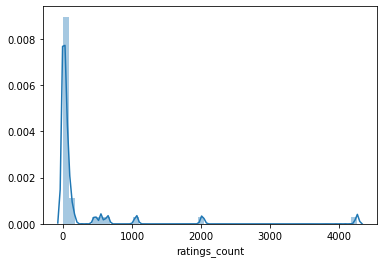

In [109]:
#Take a look on average ratings 
y = bookDataFrame['ratings_count']
sns.distplot(y)

In [110]:
#Title names isbn and ratings are marged on this file 
bookDataFrame.to_excel("top50.xls")

In [138]:
#We matched books titles and the Good Reads Ratings
TOP50= pd.read_excel("Top50.xls")
TOP50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               42 non-null     int64  
 1   id                       42 non-null     int64  
 2   isbn                     42 non-null     int64  
 3   average_rating           42 non-null     float64
 4   ratings_count            42 non-null     int64  
 5   text_reviews_count       42 non-null     int64  
 6   work_ratings_count       42 non-null     int64  
 7   work_reviews_count       42 non-null     int64  
 8   work_text_reviews_count  42 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 3.1 KB


In [139]:
TOP50['isbn']=TOP50['isbn'].astype(str)

In [140]:
BOOKS= pd.read_csv("books.csv", delimiter=";")
BOOKS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   50 non-null     object
 1   isbn    50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


In [142]:
BOOKS['isbn']=BOOKS['isbn'].astype(str)

In [143]:
BOOKS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   50 non-null     object
 1   isbn    50 non-null     object
dtypes: object(2)
memory usage: 928.0+ bytes


In [205]:
merge= pd.merge(TOP50, BOOKS, on="isbn", how="inner")
merge=merge[["title","average_rating"]]
merge

,title,average_rating
0,Aramburu,3.87
1,Lo Mucho Que Te Ame.,3.99
2,El Alma De Las Flores,4.39
3,1984,4.18
4,Belgrano : El Gran Patriota Argentino,4.00
5,Catedrales,4.03
6,1. Letramania La Imprenta Mayuscula,0.00
7,Arde La Vida,3.98
8,El Hombre En Busca De Sentido,4.36
9,Una Familia Anormal,5.00


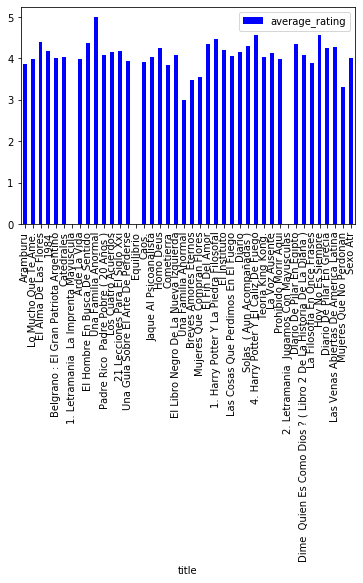

In [206]:
merge.plot (kind='bar',x='title',y='average_rating',color='blue')
plt.show()